In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import random

In [2]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [3]:
class Linear_Regression:
  def __init__(self, X_Train, Y_Target, num_epoch = 10000, learning_rate = 0.0001):
    self.X_Train = X_Train
    self.Y_Target = Y_Target
    self.num_samples = X_Train.shape[0]
    self.learning_rate = learning_rate
    self.theta = np.array([random.gauss(mu=1.0, sigma=0.01) for _ in range(X_Train.shape[1])]).reshape(-1, 1)
    self.losses = []
    self.num_epoch = num_epoch

  def predict(self, X_data):
    y_pred = X_data.dot(self.theta)
    return y_pred

  def compute_loss(self, y_pred, y_target):
    loss = (y_pred - y_target)*(y_pred - y_target)
    return np.sum(loss)

  def fit(self):
    for epoch in range(self.num_epoch):
      y_pred = self.predict(self.X_Train)
      loss = self.compute_loss(y_pred, self.Y_Target)
      self.losses.append(loss)
      k = 2*(y_pred-self.Y_Target)
      gradient = self.X_Train.T.dot(k)/self.num_samples
      self.theta = self.theta - self.learning_rate*gradient

    return (self.losses), self.theta



In [4]:
X_data = np.array([1, 2, 3, 5, 7, 10, 11, 15, 20, 25, 33, 38, 40, 42, 45, 50, 55, 56]).reshape(-1, 1)
X_raw = X_data
X_data = np.hstack(((np.ones((X_data.shape[0], 1))), X_data))
y_data = np.array([2, 4.1, 5.9, 9.8, 13.6, 21, 22, 28, 39, 44, 67, 80, 79.9, 83.3, 90.5, 99.9, 110.1, 111]).reshape(-1, 1)

In [5]:
X_data

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  5.],
       [ 1.,  7.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 15.],
       [ 1., 20.],
       [ 1., 25.],
       [ 1., 33.],
       [ 1., 38.],
       [ 1., 40.],
       [ 1., 42.],
       [ 1., 45.],
       [ 1., 50.],
       [ 1., 55.],
       [ 1., 56.]])

In [6]:
y_data.shape

(18, 1)

In [7]:
linear_model = Linear_Regression(X_data, y_data)

In [8]:
loss, weight = linear_model.fit()

In [9]:
weight

array([[0.26121704],
       [1.9892484 ]])

<function matplotlib.pyplot.show(close=None, block=None)>

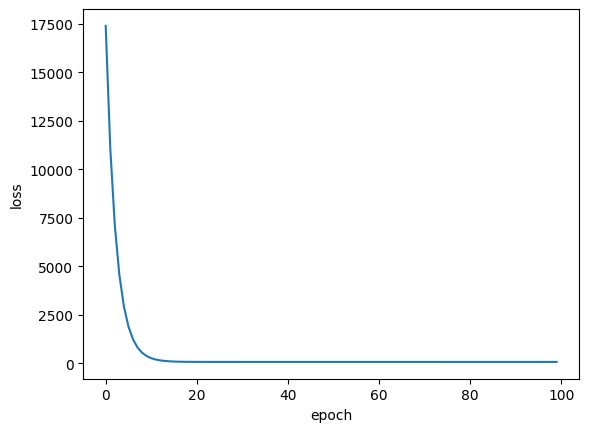

In [10]:
import matplotlib.pyplot as plt

plt.plot(loss[:100])
plt.xlabel("epoch")
plt.ylabel("loss")

plt.show

In [11]:
def MSE(y_pred, y_data):
  loss = (y_pred - y_data)**2
  return np.mean(loss)

In [12]:
y_pred = linear_model.predict(X_data)
print(X_raw.reshape(1, -1))
print(y_pred)
# mse = MSE(y_pred, y_data)
# mse

[[ 1  2  3  5  7 10 11 15 20 25 33 38 40 42 45 50 55 56]]
[[  2.25046544]
 [  4.23971384]
 [  6.22896224]
 [ 10.20745904]
 [ 14.18595584]
 [ 20.15370104]
 [ 22.14294944]
 [ 30.09994304]
 [ 40.04618503]
 [ 49.99242703]
 [ 65.90641423]
 [ 75.85265622]
 [ 79.83115302]
 [ 83.80964982]
 [ 89.77739502]
 [ 99.72363702]
 [109.66987901]
 [111.65912741]]


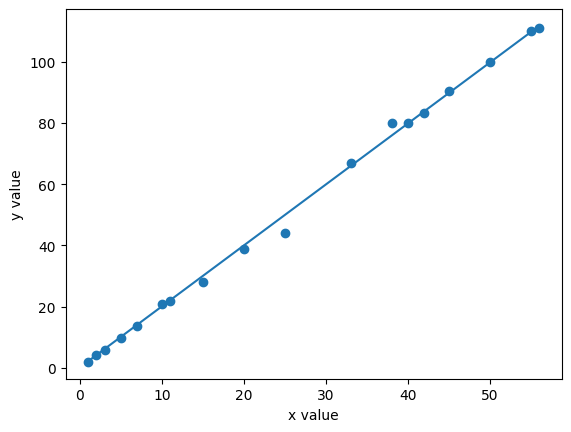

In [13]:
plt.scatter(X_raw, y_data)
plt.xlabel("x value")
plt.ylabel("y value")
w, b = weight[0], weight[1]
y_pred = [b*x + w for x in X_raw]
plt.plot(X_raw, y_pred)
plt.show()